In [2]:
!pip install --upgrade git+https://github.com/poplav/go_implementation.git@random_player

  Cloning https://github.com/poplav/go_implementation.git (to revision random_player) to /tmp/pip-req-build-cys9qyfx
Branch random_player set up to track remote branch random_player from origin.
Switched to a new branch 'random_player'
  Running setup.py bdist_wheel for Go-Implementation ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-l1dqmjec/wheels/8f/b3/d5/c9c7a725e855180421349dccf1e20a5911d2125683b4887d80
Successfully built Go-Implementation
  Found existing installation: Go-Implementation 0.1.dev0
    Uninstalling Go-Implementation-0.1.dev0:
      Successfully uninstalled Go-Implementation-0.1.dev0


In [5]:
from go_implementation.base_implementation.go_sets import Position, WHITE, BLACK
from go_implementation.players.random_player import RandomPlayer
from go_implementation.game_simulators.game_simulator import GameSimulator
import time

In [8]:
game_sim = GameSimulator()
player_one = RandomPlayer(BLACK)
player_two = RandomPlayer(WHITE)
start = time.time()
game_state_history = game_sim.play_game(player_one, player_two)
end = time.time()
print("game finished, num moves = ", len(game_state_history))
print("game time is ", (end-start))
print("player move time is ", game_state_history[-1][1:])

game finished, num moves =  104
game time is  3.0662600994110107
player move time is  (7, {'X': 2.0066442489624023, 'O': 1.0298948287963867})


In [40]:
player_one = RandomPlayer(BLACK)
player_two = RandomPlayer(WHITE)
game_results = []
for i in range(100):
    game_sim = GameSimulator()
    start = time.time()
    game_state_history = game_sim.play_game(player_one, player_two)
    game_time = time.time() - start
    num_moves = len(game_state_history)
    game_score, player_move_time = game_state_history[-1][1:]
    game_results.append((game_time, num_moves, game_score, player_move_time['X'], player_move_time['O']))

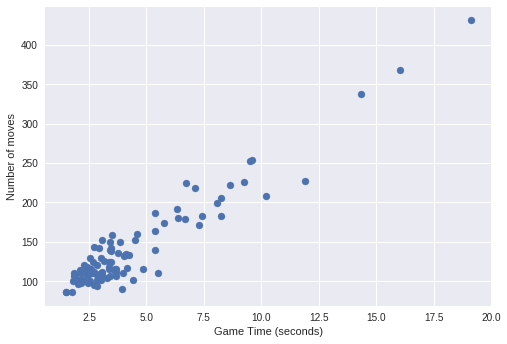

In [41]:
game_time_num_moves = [(stat[0], stat[1]) for stat in game_results]

import matplotlib.pyplot as plt
plt.scatter(*zip(*game_time_num_moves))
plt.xlabel('Game Time (seconds)')
plt.ylabel('Number of moves')
plt.show()

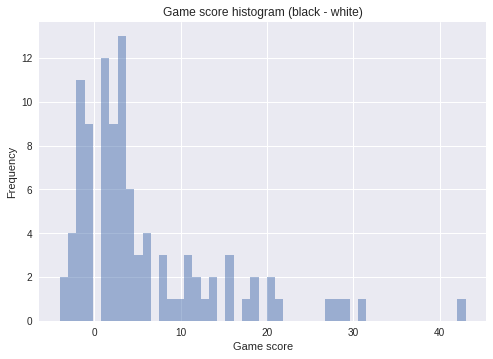

In [42]:
game_score = [stat[2] for stat in game_results]
import matplotlib.pyplot as plt
import numpy as np
import math
bins = np.linspace(math.ceil(min(game_score)), 
                   math.floor(max(game_score)),
                   50) # fixed number of bins
plt.hist(game_score, bins = bins, alpha = 0.5)
plt.title('Game score histogram (black - white)')
plt.xlabel('Game score')
plt.ylabel('Frequency')
plt.show()

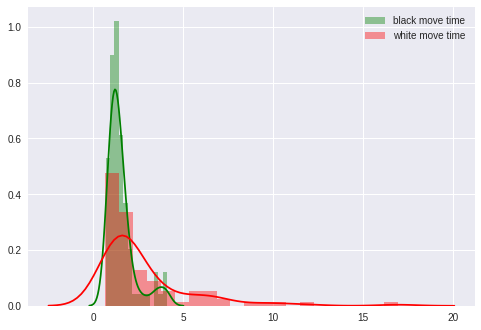

In [43]:
black_move_time = [stat[3] for stat in game_results]
white_move_time = [stat[4] for stat in game_results]
import seaborn as sns
sns.distplot(black_move_time , color="green", label="black move time")
sns.distplot(white_move_time, color="red", label="white move time")
sns.plt.legend()
sns.plt.show()

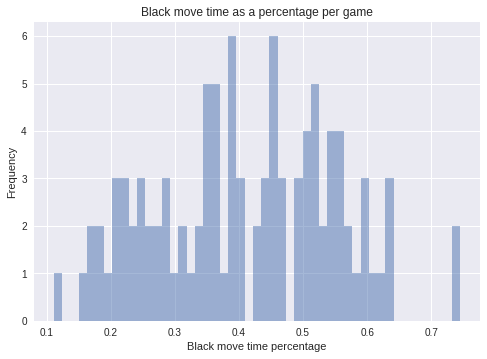

In [46]:
black_move_time_percent_per_game = [stat[3] / (stat[3] + stat[4]) for stat in game_results]
import matplotlib.pyplot as plt
import numpy as np
import math
bins = np.linspace(min(black_move_time_percent_per_game), 
                   max(black_move_time_percent_per_game),
                   50) # fixed number of bins
plt.hist(black_move_time_percent_per_game, bins = bins, alpha = 0.5)
plt.title('Black move time as a percentage per game')
plt.xlabel('Black move time percentage')
plt.ylabel('Frequency')
plt.show()

In [47]:
game_results

[(4.090535402297974, 134, 16, 1.8483598232269287, 2.2109808921813965),
 (2.3211727142333984, 111, -2, 1.350327491760254, 0.9457881450653076),
 (8.243929624557495, 183, -2, 1.3398635387420654, 6.864810228347778),
 (2.9475722312927246, 142, 12, 1.6242728233337402, 1.2914071083068848),
 (3.9439003467559814, 90, 8, 1.3084101676940918, 2.6139495372772217),
 (4.607212066650391, 160, 29, 2.4797520637512207, 2.0925285816192627),
 (3.4563283920288086, 142, 3, 1.7894136905670166, 1.6253912448883057),
 (3.614133834838867, 114, 1, 1.2676458358764648, 2.32029128074646),
 (2.719064950942993, 95, -1, 1.452317476272583, 1.2412848472595215),
 (10.205928087234497, 208, -1, 1.6421701908111572, 8.515918493270874),
 (1.8883953094482422, 108, 3, 1.0143225193023682, 0.8477973937988281),
 (4.403386354446411, 102, -2, 1.0915031433105469, 3.2845089435577393),
 (7.420869588851929, 183, -4, 1.7016181945800781, 5.679770469665527),
 (2.841738700866699, 94, 8, 1.2259232997894287, 1.5946362018585205),
 (3.69319009780